In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#1:
data = pd.read_csv('/content/cleaned_data Task2.csv')

In [29]:
#2:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [30]:
#3:
print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
Survived
0    266
1    152
Name: count, dtype: int64


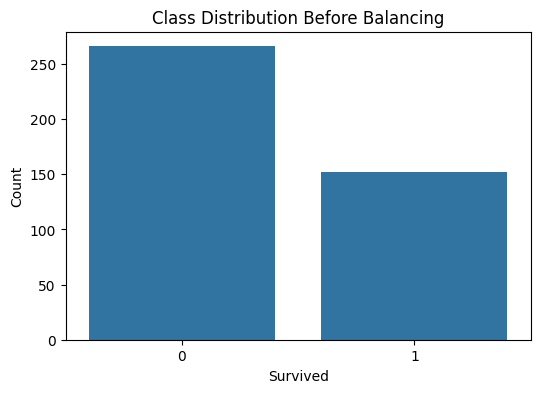

In [31]:
#4:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [32]:
#5:
smote = SMOTE(random_state=25)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [33]:
#6:
print("\nClass distribution after balancing:")
print(pd.Series(y_balanced).value_counts())


Class distribution after balancing:
Survived
0    266
1    266
Name: count, dtype: int64


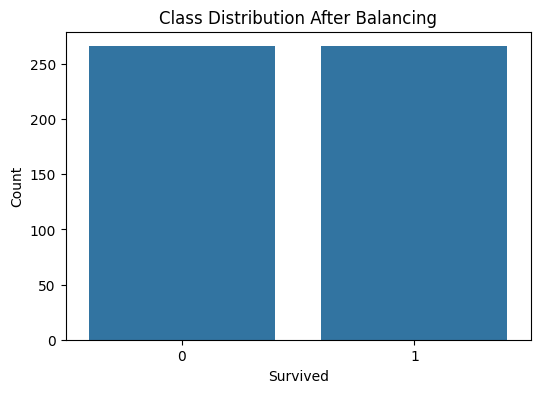

In [34]:
#7:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_balanced)
plt.title('Class Distribution After Balancing')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [35]:
#8:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=25)

In [36]:
#9:
model = LogisticRegression(max_iter=1000, random_state=25)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=25)

In [37]:
#10:
y_pred = model.predict(X_test)

In [38]:
#11:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[54  0]
 [ 0 53]]


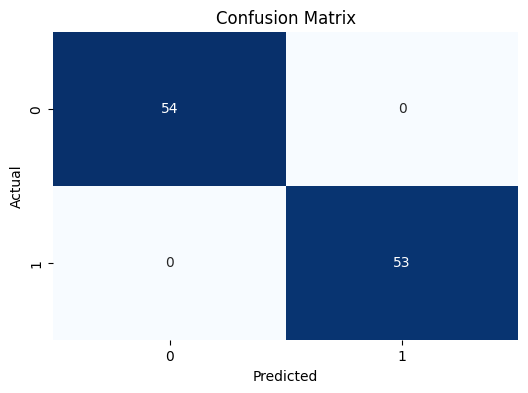

In [39]:
#12:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
#13:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
